(a) https://drive.google.com/file/d/1BjnseqUrP9AkxvQB7TJsXCt68bz2nmkN/view?usp=sharing

(b) This code is used to visualize the probability of misclassification in a binary classification problem, where two classes A and B are distinguished by a weight threshold T. Here's an explanation of each step:

**Constants for the Problem:**

mu_A, sigma_A are the mean and standard deviation for class A.
mu_B, sigma_B are the mean and standard deviation for class B.
T_values is an array of threshold values ranging from 1 to 8, used to calculate the probability of misclassification for different thresholds.

**Function to Calculate Probabilities:**

compute_probabilities is a function that calculates the probability of misclassification for a given class, mean (mu), standard deviation (sigma), and threshold (T).
For class A, it calculates the probability of misclassifying A as B, which is the probability that a sample from A is greater than the threshold T.
For class B, it calculates the probability of misclassifying B as A, which is the probability that a sample from B is less than the threshold T.

**Calculating Probabilities for Each T:**

prob_A_as_B and prob_B_as_A are lists that store the probabilities of misclassifying A as B and B as A, respectively, for each value of T in T_values.

**Calculate Bayes Error Rate:**

bayes_error is a list that stores the Bayes error rate for each value of T. The Bayes error rate is the average of the probabilities of misclassifying A as B and B as A.

**Plotting:**

A figure is created with a specified size.
Three plots are added to the figure:
1. Probability of misclassifying A as B (prob_A_as_B) vs. T.
2. Probability of misclassifying B as A (prob_B_as_A) vs. T.
3. Bayes error rate (bayes_error) vs. T, plotted with a dashed line.

The x-axis is labeled as 'Weight Threshold T', and the y-axis is labeled as 'Probability'.

A title is added to the plot, and a legend is displayed to differentiate between the three lines.

Grid lines are added for better readability.
Finally, the plot is displayed, showing how the probabilities of misclassification and the Bayes error rate change as a function of the weight threshold T.

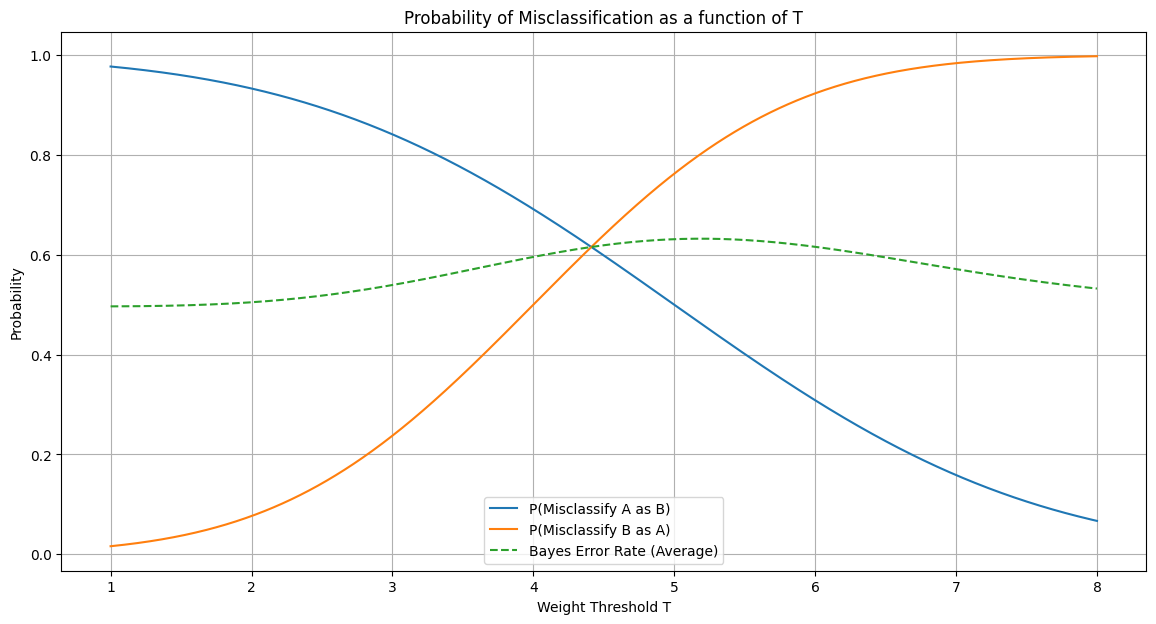

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_A, sigma_A = 5, 2
mu_B, sigma_B = 4, 1.4
T_values = np.linspace(1, 8, 1000)

def compute_probabilities(mu, sigma, T):
    if mu == mu_A:  # Misclassifying A as B
        return 1 - norm.cdf(T, loc=mu, scale=sigma)
    else:  # Misclassifying B as A
        return norm.cdf(T, loc=mu, scale=sigma)

prob_A_as_B = [compute_probabilities(mu_A, sigma_A, T) for T in T_values]
prob_B_as_A = [compute_probabilities(mu_B, sigma_B, T) for T in T_values]


bayes_error = [(p_A_as_B + p_B_as_A) / 2 for p_A_as_B, p_B_as_A in zip(prob_A_as_B, prob_B_as_A)]


plt.figure(figsize=(14, 7))
plt.plot(T_values, prob_A_as_B, label='P(Misclassify A as B)')
plt.plot(T_values, prob_B_as_A, label='P(Misclassify B as A)')
plt.plot(T_values, bayes_error, label='Bayes Error Rate (Average)', linestyle='--')
plt.xlabel('Weight Threshold T')
plt.ylabel('Probability')
plt.title('Probability of Misclassification as a function of T')
plt.legend()
plt.grid(True)
plt.show()


(c) This code simulates data points for two types of beans, A and B, and computes the misclassification rates and Bayes error for different weight thresholds.

**Simulating Data Points:**

n_data is the number of data points for each type of bean.
data_A and data_B are arrays containing simulated data points for beans A and B, respectively. The data points are generated from normal distributions with means mu_A and mu_B and standard deviations sigma_A and sigma_B, respectively.

**Initializing Arrays for Misclassification Rates:**

misclassification_rate_A and misclassification_rate_B are arrays initialized to store the misclassification rates for beans A and B, respectively, for each threshold value in T_values.

**Computing Misclassification Rates for Each Threshold T:**


For each threshold T in T_values, the code computes the misclassification rates for beans A and B.
-> misclassification_rate_A[i] is the proportion of data points in data_A that are greater than the threshold T, indicating the rate at which beans of type A are misclassified as type B.
-> misclassification_rate_B[i] is the proportion of data points in data_B that are less than or equal to the threshold T, indicating the rate at which beans of type B are misclassified as type A.

**Computing the Average Misclassification Rate (Bayes Error) for Each T:**

bayes_error_simulation is an array that stores the Bayes error for each threshold value T. It is computed as the average of the misclassification rates for beans A and B.

**Plotting:**
Finally, the plot is displayed, showing the misclassification rates for beans A and B and the Bayes error as functions of the weight threshold T for the simulated data.







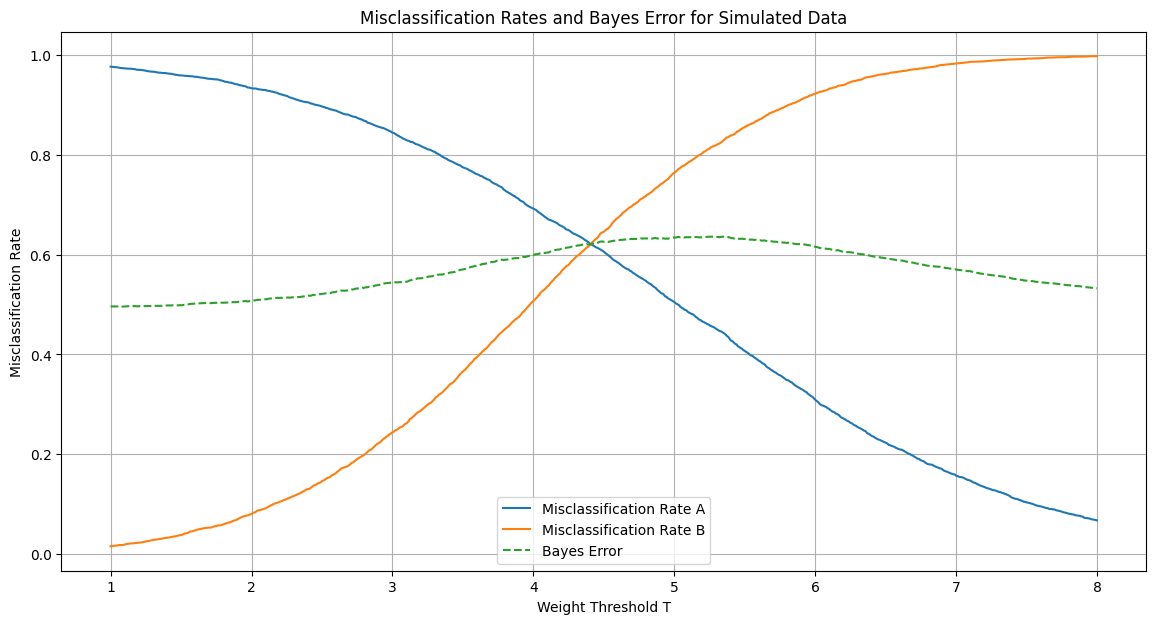

In [10]:
np.random.seed(42)

n_data = 5000
data_A = np.random.randn(n_data) * sigma_A + mu_A
data_B = np.random.randn(n_data) * sigma_B + mu_B


misclassification_rate_A = np.zeros_like(T_values)
misclassification_rate_B = np.zeros_like(T_values)


for i, T in enumerate(T_values):
    misclassification_rate_A[i] = np.mean(data_A > T)
    misclassification_rate_B[i] = np.mean(data_B <= T)


bayes_error_simulation = (misclassification_rate_A + misclassification_rate_B) / 2


plt.figure(figsize=(14, 7))
plt.plot(T_values, misclassification_rate_A, label='Misclassification Rate A')
plt.plot(T_values, misclassification_rate_B, label='Misclassification Rate B')
plt.plot(T_values, bayes_error_simulation, label='Bayes Error', linestyle='--')
plt.xlabel('Weight Threshold T')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rates and Bayes Error for Simulated Data')
plt.legend()
plt.grid(True)
plt.show()
